<a href="https://colab.research.google.com/github/yeonghun00/dc/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import datetime

In [2]:
def view_page(url, gall_num):
  try:
    url = url + str(gall_num)
    result = requests.get(url, headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
    bs_obj = BeautifulSoup(result.content, "html.parser")

    gall_num = gall_num
    title = bs_obj.find_all('span', {'class': 'title_subject'})[0].text
    content = bs_obj.find_all('div', {'class': 'write_div'})[0].text

    good = int(bs_obj.find_all('p', {'class': 'up_num'})[0].text)
    bad = int(bs_obj.find_all('p', {'class': 'down_num'})[0].text)

    date = bs_obj.find_all('span', {'class': 'gall_date'})[0].text
    views = bs_obj.find_all('span', {'class': 'gall_count'})[0].text
    comments = bs_obj.find_all('span', {'class': 'gall_comment'})[0].text

    date = datetime.datetime.strptime(date, '%Y.%m.%d %H:%M:%S')
    views = int(''.join(list(filter(str.isdigit, views))))
    comments = int(''.join(list(filter(str.isdigit, comments))))

    return [gall_num, date, title, content, good, bad, views, comments]
  except:
    pass

In [3]:
from multiprocessing import Pool

url = 'https://gall.dcinside.com/mgallery/board/view/?id=kospi&no='
current_id = 2184567
num = 500

with Pool() as p:
    galls = p.starmap(view_page, list(zip([url]*num, [x for x in range(current_id - num, current_id)])))

In [4]:
import pandas as pd

df = pd.DataFrame([x for x in galls if x!=None], columns=['id', 'datetime', 'title', 'content', 'good', 'bad', 'views', 'comments'])

In [5]:
df['content'] = [x.replace('\n',' ').replace('- dc official App', '') for x in df['content']]

In [6]:
df

,id,datetime,title,content,good,bad,views,comments
0,2184067,2022-06-29 13:39:41,업소 가면 100% 무시 당할 확률 높은지 판단 ㅂ탁드립니다,어릴 때 여드름 치료를 못해도 온몸에 켈로이드 흉터인데아는 사람도 없고 아무것도 ...,0,0,140,11
1,2184068,2022-06-29 13:40:21,아씨발 왜운지하는데,큐ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ...,0,0,43,0
2,2184069,2022-06-29 13:40:34,이거보고 오늘 저녁생각 사라졌다,누군 햇반 돌리고 있겠지 이게 세상의 불공평함인 듯 하다,0,0,49,0
3,2184070,2022-06-29 13:40:45,장 봊나좋노 익이얔ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,머ㅡ호황 컄ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,0,0,22,0
4,2184071,2022-06-29 13:41:05,비온다이씨발새끼야딸배드가자ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ,컄ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,0,0,17,0
...,...,...,...,...,...,...,...,...
76,2184171,2022-06-29 14:07:50,종목들 죄다 양전하네,,0,0,79,2
77,2184174,2022-06-29 14:09:09,떡락장 이후로 크게 오른것도 없는게 사실임 딱히 매물이 나올게 없지,요즘 개미들 똑똑함 ㅋㅋ,0,0,37,1
78,2184175,2022-06-29 14:09:24,sk바사 주포들 개씹양아치네 진짴ㅋㅋㅋㅋㅋㅋㅋㅋ,허가 완료 브리핑 나오는순간개미들 겁주고 털려고 물량 풀었다가다시 담아 말아올리는...,0,0,102,2
79,2184176,2022-06-29 14:09:36,혹시 70년대에 주식한 사람 없냐?,경기침체오면 기업들이 배당률에 맞춰서 배당줄이냐? 은행주나 보험주 그런 애들 실...,0,0,56,0


In [7]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-06-30 06:04:19--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip.1’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   147MB/s    in 0.8s    

2022-06-30 06:04:20 (147 MB/s) - ‘NotoSansCJKkr-hinted.zip.1’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LICENSE_OFL.txt         
replace NotoSansCJKkr-Black.otf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: NotoSansCJKkr-Black.otf  
replace NotoSansCJKkr-Bold.otf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: NotoS

In [8]:
!pip install konlpy

y
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from konlpy.tag import Hannanum
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class Analyser:
  def __init__(self, df):
    self.df = df

  def get_tokenized(self, text):
    hannanum = Hannanum()
    return hannanum.morphs(text) 

  def get_cleaned(self, text):
    text = ([x for x in text if len(x) > 1])
    d = {i:text.count(i) for i in set(text) if text.count(i) > 1}
    words = ' '.join(d.keys())
    return words

  def get_wordcloud(self, column=''):
    t = analyser.df[column]
    words = self.get_tokenized(' '.join(t))
    words = self.get_cleaned(words)
    words = words.split()
    text = ' '.join(words)
    stop_words = []
    wordcloud = WordCloud(stopwords = stop_words, \
                          font_path='/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf', \
                          background_color='white', \
                          width=1200, height=800).generate(text)
    plt.figure(figsize=(18,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [10]:
analyser = Analyser(df)

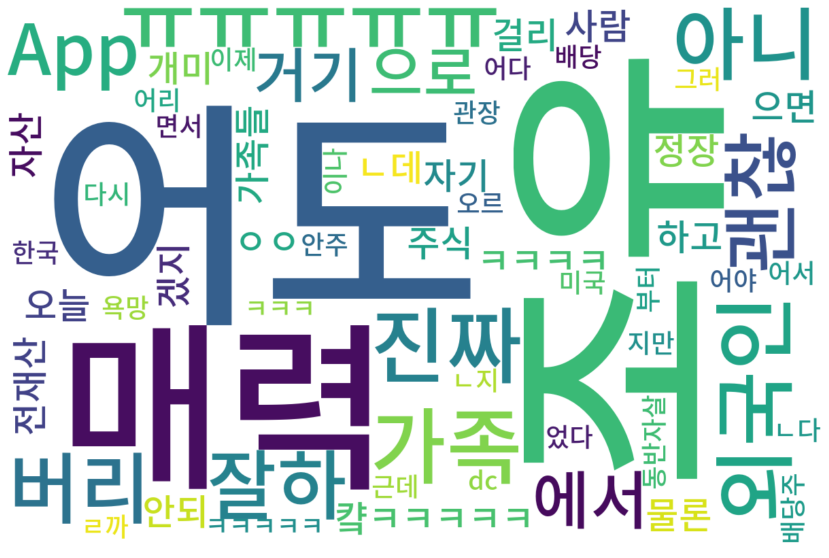

In [11]:
analyser.get_wordcloud('content')